<a href="https://colab.research.google.com/github/chempani03/data-projects/blob/main/(UNI)%20Brain_Tumors_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applications of artificial intelligence: Image Classifier of Brain Tumors from MRI scans

---

Report Written by: Carlos Herrera Castanos


## Introduction: 

The rise of artificial intellegence has expanded into technically, every possible industry. This expansion has not only affected natural human procedure, enhanced output efficiency, and established a new way of life, but it also has tremendous benefits when looking at one of the leading causes of death; brain tumors. 

According to the [American Association of Neurological Surgeons](https://www.aans.org/en/Patients/Neurosurgical-Conditions-and-Treatments/Brain-Tumors), a brain tumor is *'is an abnormal mass of tissue in which cells grow and multiply uncontrollably... unchecked by mechanisms that control normal cells'*.

These brain tumors vary in terms of origination, development, and severity. However, the origination of the tumor can be classified by two types of groups: Primary Brain Tumors and Metastatic Brain Tumors.

---

### Primary and Metastatic Brain Tumors:

Essentially, primary tumors are those that are found at the brains site of originality. In contrast, Metastatic tumors originate in the brain and spread to other parts of the body during the development phase.

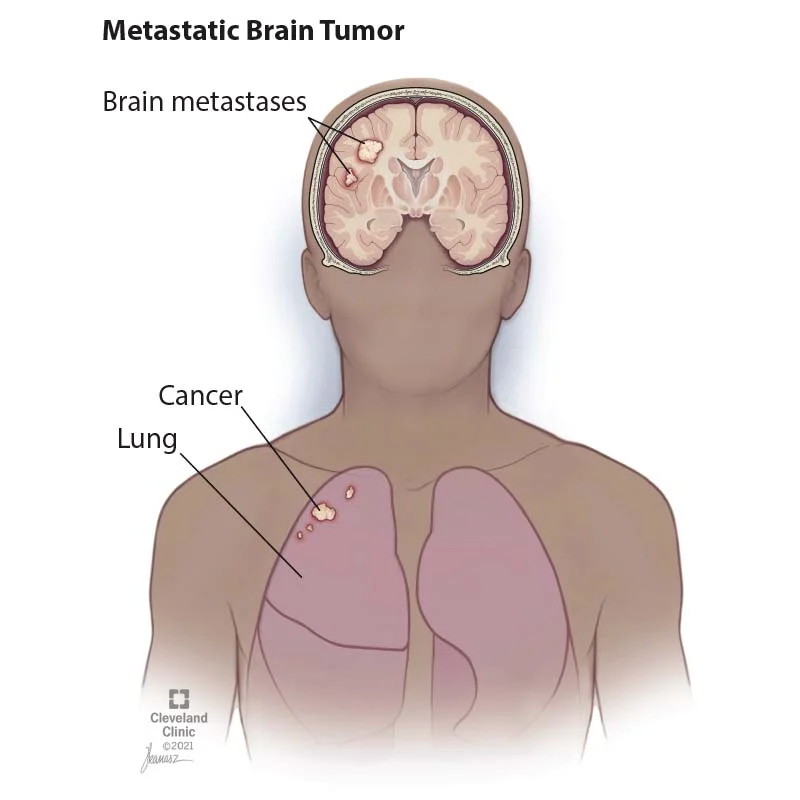

https://my.clevelandclinic.org/-/scassets/Images/org/health/articles/17225-metastatic-brain-tumor

### Malignant and Benign Tumors:

Furthermore, the tumor can further be classified into how much they develop and overtake healthy cells. Malignant/Cancerous tumors are commonly known to be lethal, as their rate of expansion keeps increasing. On the contrary, benign tumors are stable and not necessarily life threatning. 

Given the pace and progression of growth, it is often observed that primary tumors tend to be predominantly benign, while metastatic tumors are more commonly malignant.

There are more than 100 different types of brain tumors, each with its own set of unique characteristics, however, their nature can mostly be listed within the 2 types of groups discussed above.

### AI and its benefits:

Annually, around 12000 humans are diagnosed with brain tumors, with a 5-year survival rate for malignant brain or CNS (central nervous system) tumors of about 34% for men and 36% for women. To extend patients' lives, accurate diagnosis and thoughtful treatment planning are essential. The best method for finding brain tumors is magnetic resonance imaging (MRI), which produces an enormous amount of image data that needs to be analyzed by radiologists. However, because of the complexity of brain tumors and their characteristics, manual examination can be prone to errors when classifying to a large extent.

Automated classification techniques utilizing Machine Learning (ML) and Artificial Intelligence (AI) have continuously demonstrated superior accuracy than manual classification as a means of overcoming these difficulties. As a result, developing a system that integrates deep learning techniques like Convolutional Neural Network (CNN), Artificial Neural Network (ANN), and Transfer Learning (TL) can help medical professionals all over the world identify and categorize brain cancers. This system intends to boost the accuracy of diagnosis, enhance treatment planning, and ultimately raise the life expectancy of patients with brain tumors by utilizing the power of AI.

### A brief overview on Neural networks and Computer Vision

A neural network is a machine learning model inspired by the human brain's structure and functioning. It consists of interconnected artificial neurons that work together to process and analyze data, enabling the network to learn and make predictions.

Neural networks are commonly used in image classification tasks, where the goal is to assign predefined labels or categories to images. Here's a simple overview of how they are used:

1. Data Preparation: The first step is to collect and prepare a dataset of labeled images. This dataset is divided into two parts: a training set and a test set. The training set is used to train the neural network, while the test set is used to evaluate its performance.

2. Architecture Design: The neural network's architecture defines its structure, which consists of multiple layers of interconnected neurons. In image classification, a common architecture is the Convolutional Neural Network (CNN). CNNs are designed to effectively handle the spatial structure of images.

3. Training: During the training phase, the neural network learns to recognize patterns and features in the training images. It does this by adjusting the weights and biases of its neurons based on the error it makes in its predictions. This process is known as backpropagation and involves optimizing the network's parameters to minimize the difference between predicted and actual labels.

4. Forward Propagation: Once the network is trained, it can make predictions on new, unseen images. This is done through forward propagation, where the image is fed into the network, and the activations of the neurons are calculated layer by layer. The output of the network represents the predicted label for the input image.

5. Evaluation: The predictions made by the network are compared to the true labels of the test images to assess its accuracy. Various evaluation metrics, such as accuracy, precision, recall, and F1 score, can be used to measure the network's performance.

6. Fine-tuning and Optimization: If the network's performance is not satisfactory, it can be further optimized by adjusting hyperparameters, modifying the architecture, or increasing the training data. This iterative process of refining the network is aimed at achieving better accuracy and generalization.

*Neural network for image recognition:*

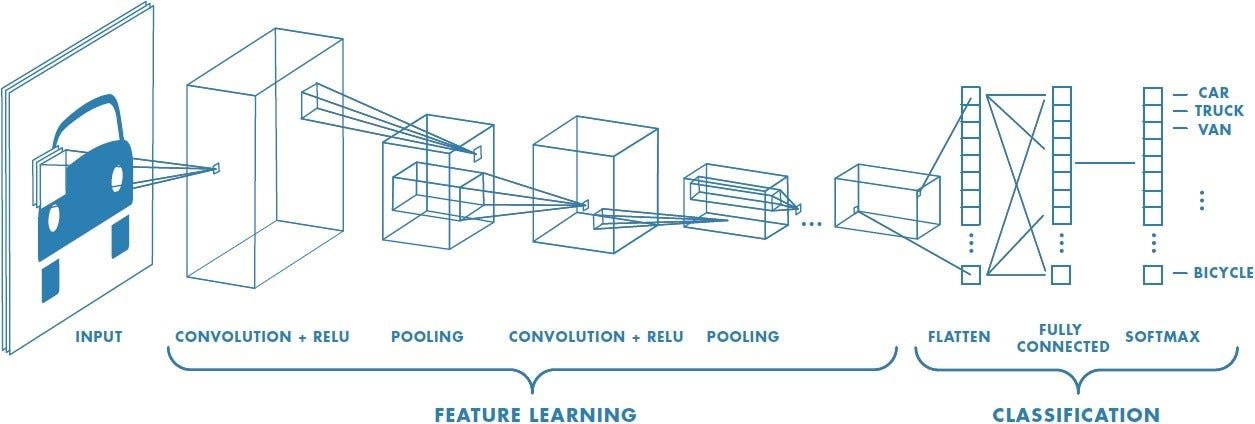

### The notebooks purpose/structure:

1. Load the data into the google colab
2. Explore the data to better understand brain tumors using the provided information.
3. Create a multiclass image classifier for predicting tumor types from internet pictures.
  - Utilize a Convolutional Neural Network (Tensorflow).
  - Perform data processing and data augmentation.
  - Provide a brief explanation of the aspects of the Convolutional Neural Network and its properties.
4. Evaluate the statistical metrics of the model and interpret its validity.
5. Identify further ways to improve the model.

This report is also designed to be accessible to individuals with no prior knowledge of brain tumors or convolutional neural networks (though having an idea of a neural network and its properties would be beneficial), enabling them to gain knowledge, develop interest, and enhance their skills in this domain.

### The Data:

The data is obtained from kaggle, by the title of [Brain Tumor Classification (MRI)](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri).

The dataset consists of two folders; Testing and Training data, although we can train our model on the training data and evaluate its predictions on the testing data, we will make predictions on pictures from the internet. Therefore the testing data will be converted to validation data once our model is being built. For statistical inference however, the validation data will be used.

There are 4 types of classes in our multiclass dataset:
  - No tumor 
  - Pituitary Tumor
  - Meningioma Tumor
  - Glioma Tumor

The nature of these tumors will be explored in this notebook when we do explaratory data analysis.

## Loading, Exploring, and Preprocessing Data

### Loading Data

In [1]:
#load libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
#get kaggle API key and dataset
! pip install -q kaggle
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download sartajbhuvaji/brain-tumor-classification-mri

 98% 85.0M/86.8M [00:03<00:00, 28.6MB/s]
100% 86.8M/86.8M [00:03<00:00, 27.7MB/s]


In [6]:
#unzip dataset
import zipfile 
zip_ref = zipfile.ZipFile("/content/brain-tumor-classification-mri.zip")
zip_ref.extractall()
zip_ref.close()

In [7]:
#create classes/class names
import pathlib 
data_dir = pathlib.Path("/content/Training")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


### Exploratory Data Analysis (EDA)

image shape: (474, 474, 3)


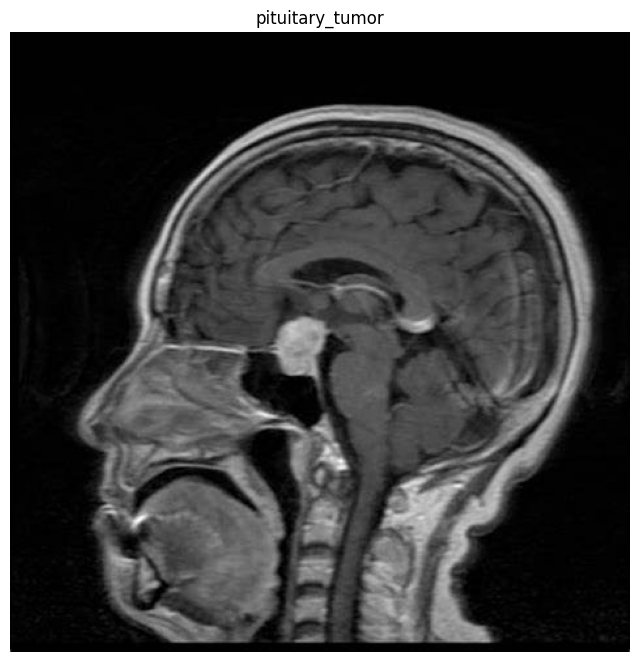

In [24]:
###lets get random images
import os
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
  """
  Gets a random image with the class label from the training directory
  """  
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])


  plt.figure(figsize = (8,10))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f"image shape: {img.shape}")
  return img

img = view_random_image(target_dir = '/content/Training/',
                        target_class = random.choice(class_names))

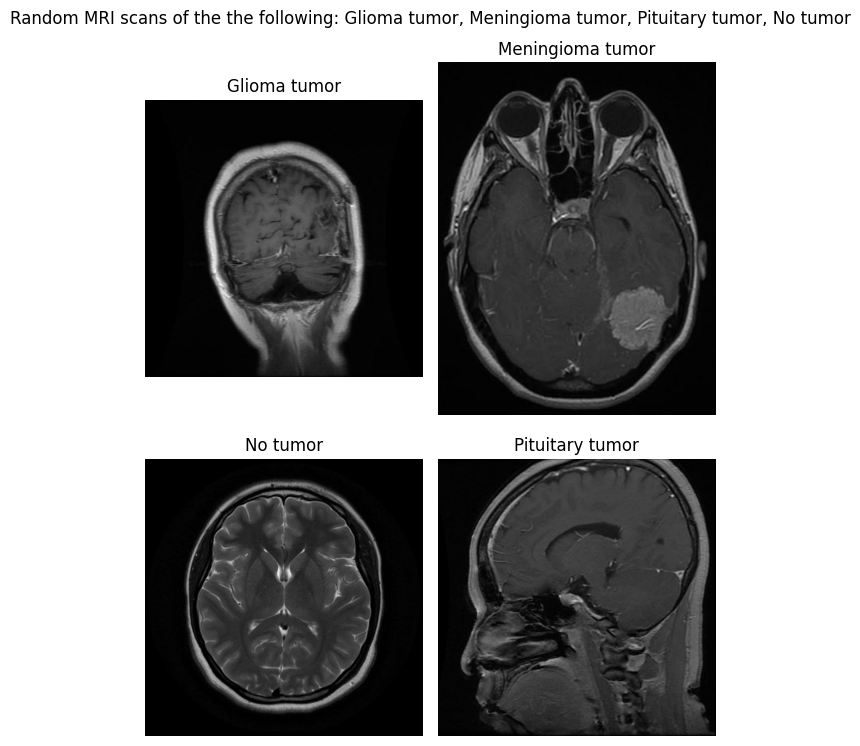

In [9]:
def view_random_classes(target_dir,classes):
  """
  creates subplots for all different types of tumors
  """
  num_classes = len(classes)

  fig, axes = plt.subplots(nrows = int(len(classes)/2), ncols = int(len(classes)/2),figsize=(6,8))

  for i, ax in enumerate(axes.flat):
          target_folder = target_dir + classes[i]
          random_image = random.sample(os.listdir(target_folder), 1)
          img = mpimg.imread(target_folder + '/' + random_image[0])
          ax.imshow(img)
          ax.set_title(classes[i].replace('_', ' ').capitalize())
          ax.axis(False)

  fig.suptitle('Random MRI scans of the the following: Glioma tumor, Meningioma tumor, Pituitary tumor, No tumor')

  plt.tight_layout()

view_random_classes("/content/Training/", class_names)

Running the random image generator multiple times helped me gain deeper knowledge of each type of class...

Here are some general characteristics that may help differentiate these tumor types on MRI:

1. Location: The location of the tumor within the brain can provide initial clues. Meningiomas are often found outside the brain tissue,while gliomas and pituitary tumors are usually located within the brain tissue itself or near the pituitary gland, respectively.

2. Tumor Shape and Margins: Different tumor types can have distinctive shapes and margins. For instance, gliomas tend to have irregular shapes with poorly defined margins, whereas meningiomas often appear as well-defined, round or lobulated masses. Pituitary tumors can vary in shape but are typically located near the sella turcica (a bony structure in the skull).

3. Mass Effect: The impact of the tumor on the surrounding structures can be indicative. Gliomas often cause significant mass effect, resulting in compression or displacement of nearby brain structures. Meningiomas and pituitary tumors can also exert mass effect but may have distinct patterns based on their location.

A better understanding of the brain tumors can help us now create preprocess the data properly into a suitable format for our model to be built on and fit on, we will resize the images, and do some basic data augmentation(altering the image). 

### Preprocessing Data (data augmentation)

In [10]:
#create training and testing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/Training"
test_dir = "/content/Testing"


#alter the image a bit, better for the model to learn image patterns
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                    rotation_range = 0, #rotation of an image
                                    shear_range = 0, # how much the image is distorted
                                    zoom_range = 0,
                                    width_shift_range = 0, #move image around on the x axis
                                    height_shift_range = 0, #move image around on y axis
                                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224), #width and height px values 
                                               class_mode = 'categorical', #type of classification
                                               batch_size = 40, #so the model doesnt overload, it will be trained on batches, rather than all the images at once
                                               shuffle = True) #shuffling images inorder for the model to not have to learn class by class

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = 'categorical',
                                               batch_size = 40, shuffle = True)


print(f"There are {len(train_data)} batches in the training set consisting of 32 images")
print(f"There are {len(test_data)} batches in the testing set consisting of 32 images")

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
There are 72 batches in the training set consisting of 32 images
There are 10 batches in the testing set consisting of 32 images


## Creating our model

### Create, Compile, and Fit our model

In [11]:
#import CNN model libraries
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [12]:
#create the model architecture
model_1 = Sequential([
    Conv2D(filters = 64, #number of filters per convolutional layer 
           kernel_size = (5,5), #size of filterts
           activation = 'relu',  #non-linear function
           input_shape = (224,224,3)), #shape of our images
    MaxPool2D(),
    Dropout(0.25), #incase data is overfitted, this dropout layer is called
    Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    MaxPool2D(pool_size=(2,2), strides = (2,2)),
    Dropout(0.25),
    Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    MaxPool2D(pool_size = (2,2),strides = (2,2)),
    Dropout(0.3),
    Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(1024,activation = 'relu'),
    Dropout(0.5),
    Dense(4, activation = 'softmax')
])

#compile the model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(learning_rate = 0.001, beta_1=0.9, beta_2 = 0.999),
                metrics = ['accuracy'])


#fit the model
history_1 = model_1.fit(train_data, epochs = 50, steps_per_epoch = len(train_data),
            validation_data = test_data, validation_steps = len(test_data))

Epoch 1/50
72/72 [==============================] - 43s 327ms/step - loss: 1.2689 - accuracy: 0.4056 - val_loss: 1.6576 - val_accuracy: 0.2005
Epoch 2/50
72/72 [==============================] - 20s 278ms/step - loss: 0.8782 - accuracy: 0.6233 - val_loss: 1.8438 - val_accuracy: 0.2919
Epoch 3/50
72/72 [==============================] - 20s 275ms/step - loss: 0.7480 - accuracy: 0.6822 - val_loss: 1.7812 - val_accuracy: 0.3096
Epoch 4/50
72/72 [==============================] - 19s 264ms/step - loss: 0.6534 - accuracy: 0.7282 - val_loss: 1.7302 - val_accuracy: 0.3503
Epoch 5/50
72/72 [==============================] - 20s 274ms/step - loss: 0.6137 - accuracy: 0.7348 - val_loss: 1.6653 - val_accuracy: 0.3883
Epoch 6/50
72/72 [==============================] - 20s 276ms/step - loss: 0.5723 - accuracy: 0.7540 - val_loss: 1.6216 - val_accuracy: 0.4416
Epoch 7/50
72/72 [==============================] - 19s 265ms/step - loss: 0.4853 - accuracy: 0.7979 - val_loss: 1.5884 - val_accuracy: 0.5102

### How does the model learn? Tackling the layer architecture:

From the output above, the model has a 98% accuracy on the training data and 72% accuracy on the validation data. It is to mention however, that the model has also started with much lower accuracy scores at the beginning of the training, how did this model learn the features of each class? Lets digest the model architecture, we will use `model.summary()` to look at the layers, shapes, and parameters of the model:

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 128)       0

Conv2d layers, maxpooling layers, and so on.. what does all this mean? 

---
Well, as seen in the parameters column, it seems that the image is undergoing *some kind* of process within the Conv2D layer as there are many trainable parameters (lets refer to them as neurons from now on) which is then passed on to the next layers and eventually back to the Conv2D layer... what is going on within the Conv2D layer however? 

Lets visualize the *filters* of the Conv2D layer and create a description and definition of this model architecture to distinguish how it learns:

A filter within the CNN model is a convolutional calculation done on the pixelated image in order to define important aspects of the image (its done pixel by pixel), for a visualization example, check out the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website.

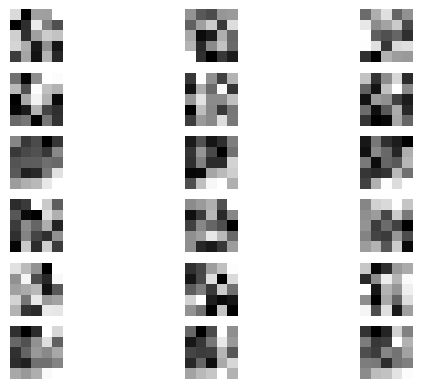

In [14]:
def visualize_filters(model, layer_index):
  """
  visualizes the filters inside the model, make sure to know the right layer_index
  by using model.summary()
  """
  if layer_index >= len(model.layers):
      num_layers = len(model.layers)
      print(f"Invalid layer index. The model has {num_layers} layers.")
      return
  
  layer = model.layers[layer_index]
  filters, biases = layer.get_weights()

  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)

  n_filters, ix = 6, 1

  for i in range(n_filters):
      f = filters[:, :, :, i]

      for j in range(3):
          ax = plt.subplot(n_filters, 3, ix)
          ax.set_xticks([])
          ax.set_yticks([0])
          plt.imshow(f[:, :, j], cmap='gray')

          ix += 1
          plt.axis(False)
  plt.show()

visualize_filters(model_1, 0)

**Understanding the architecture of our model:**

The visualizations of filters in a CNN represent the learned features by the model at different layers. Each filter corresponds to a specific pattern or feature that the model has learned to detect. In the context of brain tumor classification, these filters capture meaningful information from the input images that help the model distinguish between different types of tumors.

In the given model summary, there are multiple convolutional layers with different filter sizes. The initial layers capture low-level features such as edges, corners, and textures. As the network deepens, the filters become more specialized and learn higher-level representations that are more relevant to the task of tumor classification. The pooling layers and dropout layers help in reducing the spatial dimensions and regularizing the model, respectively.


---
Convolutional calculations of filters and image in Conv2D layer:

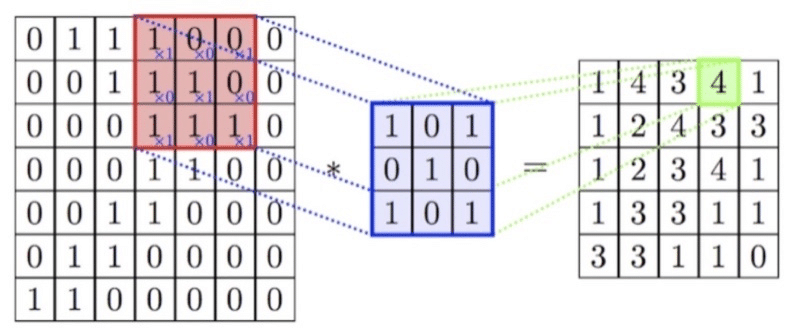

This calculation, performed on every pixel of every image of every neuron with different filters lets the model know of important features.

---

Spatial dimension reduction means reducing the amount of noise inside a dimension of an image but still retaining its important features:

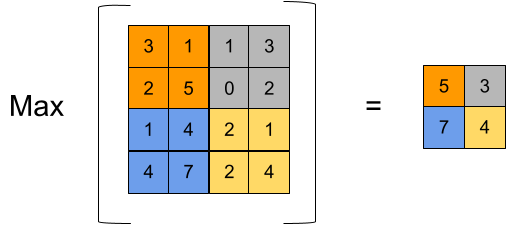

As you can see with the max pooling layers, from the output of the convolutional calculations within the Conv2D layer, the output are the most important features (Maxpool) -> max value.

---

By visualizing the filters, one can gain insights into what the model focuses on when analyzing brain tumor images. For example, some filters may be sensitive to tumor boundaries, while others may highlight specific texture patterns or structural characteristics. These visualizations can aid in understanding the inner workings of the model, verifying if it is learning meaningful representations, and potentially identifying any biases or artifacts.

### Lets predict now:

Now that we have an idea how our model is learning, lets obtain an image from the internet of the pituitary tumor and pass it through our model. Its important to know however, that it must have the same preprocessing techniques done to it as our model is fitted on said techniques.

The image is obtained from [this link](http://operativeneurosurgery.com/lib/exe/fetch.php?media=breast_cancer_pituitary_metastases.jpeg) and its an MRI of the pituitary tumor, therefore our true label is the pituitary tumor

In [15]:
!wget http://operativeneurosurgery.com/lib/exe/fetch.php?media=breast_cancer_pituitary_metastases.jpeg

--2023-06-12 13:36:48--  http://operativeneurosurgery.com/lib/exe/fetch.php?media=breast_cancer_pituitary_metastases.jpeg
Resolving operativeneurosurgery.com (operativeneurosurgery.com)... 217.160.0.181, 2001:8d8:100f:f000::258
Connecting to operativeneurosurgery.com (operativeneurosurgery.com)|217.160.0.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21860 (21K) [image/jpeg]
Saving to: ‘fetch.php?media=breast_cancer_pituitary_metastases.jpeg’

fetch.php?media=bre 100%[===================>]  21.35K  --.-KB/s    in 0.02s   

2023-06-12 13:36:48 (1.15 MB/s) - ‘fetch.php?media=breast_cancer_pituitary_metastases.jpeg’ saved [21860/21860]



In [16]:
pred_1 = mpimg.imread("/content/fetch.php?media=breast_cancer_pituitary_metastases.jpeg")

(-0.5, 441.5, 441.5, -0.5)

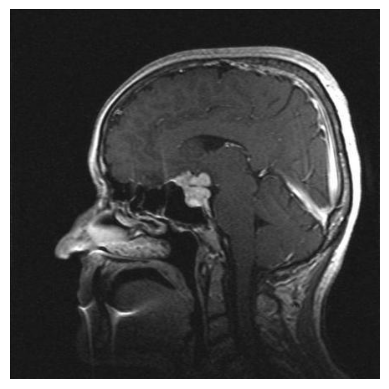

In [17]:
plt.imshow(pred_1)
plt.axis(False)

In [18]:
def predict_and_plot(model, filepath, class_names):
  """
  gets image, predicts on it, and visualizes prediction
  """
  ### preprocess image
  img = tf.io.read_file(filepath)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, [224,224])
  img = img/255.

  pred = model.predict(tf.expand_dims(img, axis = 0))

  pred_class = class_names[pred.argmax()]

  image = mpimg.imread(filepath)
  plt.imshow(image)
  plt.title(f'Predicted Class: {pred_class}')
  plt.axis(False)

1/1 [==============================] - 0s 339ms/step


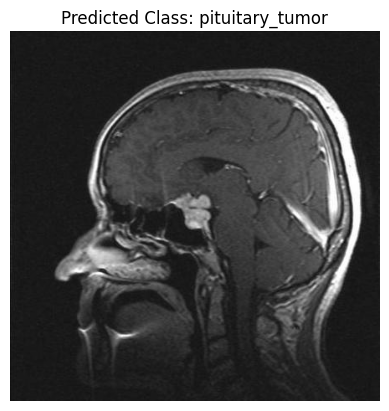

In [19]:
predict_and_plot(model = model_1,
                 filepath = "/content/fetch.php?media=breast_cancer_pituitary_metastases.jpeg",
                 class_names = class_names)

In [20]:
!wget "https://www.melbourneradiology.com.au/wp-content/uploads/2021/06/MRI-BRAIN-WITH-CONTRAST-0002.jpg"

--2023-06-12 13:55:06--  https://www.melbourneradiology.com.au/wp-content/uploads/2021/06/MRI-BRAIN-WITH-CONTRAST-0002.jpg
Resolving www.melbourneradiology.com.au (www.melbourneradiology.com.au)... 34.87.239.38
Connecting to www.melbourneradiology.com.au (www.melbourneradiology.com.au)|34.87.239.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37753 (37K) [image/jpeg]
Saving to: ‘MRI-BRAIN-WITH-CONTRAST-0002.jpg’

MRI-BRAIN-WITH-CONT 100%[===================>]  36.87K   117KB/s    in 0.3s    

2023-06-12 13:55:08 (117 KB/s) - ‘MRI-BRAIN-WITH-CONTRAST-0002.jpg’ saved [37753/37753]



1/1 [==============================] - 0s 20ms/step


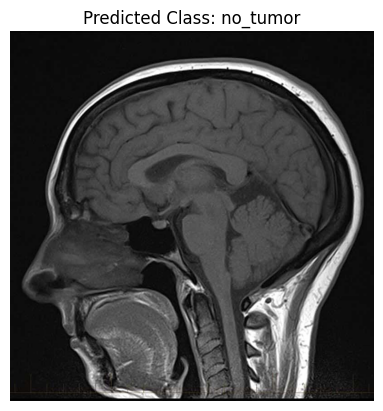

In [22]:
predict_and_plot(model = model_1,
                 filepath = "/content/MRI-BRAIN-WITH-CONTRAST-0002.jpg",
                 class_names = class_names)

### Interpretation and Conclusion

Our model predicted correctly the type of tumor! However, we must now come to terms with the accuracy scores for the training data and the validation data. Lets interpret it in context to our report:

**Interpretation:**

In the context of a CNN model trained on MRI images of brain tumors, an accuracy score of 98% suggests that the model performs well in correctly classifying the brain tumor types. This means that, on the dataset used for training, the model achieved an overall accuracy of 98% in predicting the correct tumor type.

On the other hand, the validation accuracy score of 70% indicates the model's performance on a separate dataset that was not used during training, but rather for evaluating its generalization ability. The lower validation accuracy suggests that the model may not be performing as well when presented with new, unseen MRI images.

While the training accuracy of 98% demonstrates that the model has learned the training data well, the lower validation accuracy suggests that the model may be overfitting the training data. Overfitting occurs when a model becomes too specific to the training dataset and does not generalize well to new data.

To improve the model's performance and address overfitting, several steps could be taken:

- introduce more data augmentation
- fit model on more data
- use transfer learning (already trained CNN models)
- introduce callbacks

For now, i hope that the power of convolutional neural networks have been demonstrated on such a serious subject. 